Exercise: Predict Car Prices using Multiple Linear Regression 🚗💰


Dataset (Features → Car Price in $1000s)

Features: Age (years),Mileage (1000 km), Engine Size (L)

In [14]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import  LinearRegression

from sklearn.preprocessing import StandardScaler



In [7]:
# Dataset (Age, Mileage, Engine Size) → Car Price
X = np.array([
    [1, 10, 2.0],
    [3, 30, 2.2],
    [5, 50, 2.5],
    [7, 70, 2.8],
    [10, 100, 3.0],
    [12, 120, 3.2]
])

Y = np.array([35, 28, 24, 19, 15, 12])  # Car Price in $1000s



(6, 3)

In [10]:
#Features Scalling (Normalization)

scalar=StandardScaler()

X_norm=scalar.fit_transform(X)


# Add bias column (x0 = 1)
X_bias = np.c_[np.ones(X.shape[0]), X_norm]
X_bias

array([[ 1.        , -1.39792649, -1.39792649, -1.44792189],
       [ 1.        , -0.87370406, -0.87370406, -0.9783256 ],
       [ 1.        , -0.34948162, -0.34948162, -0.27393117],
       [ 1.        ,  0.17474081,  0.17474081,  0.43046326],
       [ 1.        ,  0.96107446,  0.96107446,  0.90005955],
       [ 1.        ,  1.4852969 ,  1.4852969 ,  1.36965584]])

In [28]:
# Initialize parameters
theta = np.zeros(X_bias.shape[1])
alpha = 0.1  # Learning rate
iterations = 1000
m = len(Y)  # Number of training samples
cost_history = []


theta

array([0., 0., 0., 0.])

In [30]:
# Gradient Descent Algorithm
for _ in range(iterations):
    y_pred = X_bias @ theta  # Predictions
    error = y_pred - Y
    cost = (1 / (2 * m)) * np.sum(error ** 2)  # Mean Squared Error
    cost_history.append(cost)

    # Compute gradients and update parameters
    gradients = (1 / m) * (X_bias.T @ error)
    theta -= alpha * gradients

# Print final parameters
print(f"Final Theta Coefficients: {theta}")




Final Theta Coefficients: [22.16666667 -0.64124051 -0.64124051 -6.47810772]


(4,)

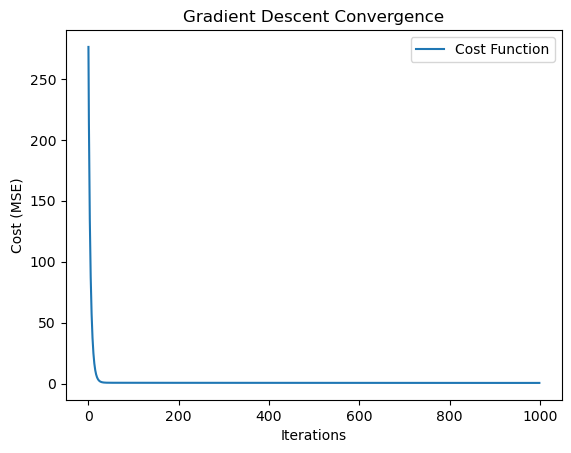

In [15]:
plt.plot(range(iterations), cost_history, label="Cost Function")
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Gradient Descent Convergence")
plt.legend()
plt.show()


In [32]:
# Given Car: 6 years old, 60,000 km, 2.6L engine
new_car = np.array([[6, 60, 2.6]])

new_car_norm=scalar.transform(new_car)
new_car_bias = np.c_[np.ones(new_car.shape[0]), new_car_norm]
# Predict price
predicted_price = new_car_bias @ theta

print(f"Predicted Car Price: ${predicted_price[0] * 1000:.2f}")
new_car_bias


Predicted Car Price: $22532.23


array([[ 1.        , -0.08737041, -0.08737041, -0.03913302]])